In [ ]:
pip install Pillow

In [ ]:
pip install numpy

In [ ]:
pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print("Number of training samples:", train_generator.samples)
print("Number of testing samples:", test_generator.samples)


Number of training samples: 14
Number of testing samples: 6


In [ ]:
import  numpyas np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Define data directories
train_data_dir = '/content/drive/MyDrive/train1'
test_data_dir = '/content/drive/MyDrive/test 1'

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 10
epochs = 5

# Create data generators with rescaling and data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Check the number of classes and class labels
num_classes = train_generator.num_classes
class_labels = list(train_generator.class_indices.keys())
print("Number of classes:", num_classes)
print("Class labels:", class_labels)

# Check the number of samples in generators
print("Number of training samples:", train_generator.samples)
print("Number of testing samples:", test_generator.samples)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
try:
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs,
        validation_data=test_generator,
        validation_steps=test_generator.samples // batch_size
    )

    # Save the model
    model.save('crop_disease_model.h5')
except Exception as e:
    print("An error occurred during training:", str(e))



Found 14 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Number of classes: 2
Class labels: ['diseased', 'healthy']
Number of training samples: 14
Number of testing samples: 6
Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 0.6737 - accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 1s 737ms/step - loss: 0.6523 - accuracy: 0.6000
Epoch 3/5
1/1 [==============================] - 0s 466ms/step - loss: 0.5276 - accuracy: 0.7500
Epoch 4/5
1/1 [==============================] - 0s 421ms/step - loss: 0.7607 - accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 1s 742ms/step - loss: 0.8038 - accuracy: 0.5000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


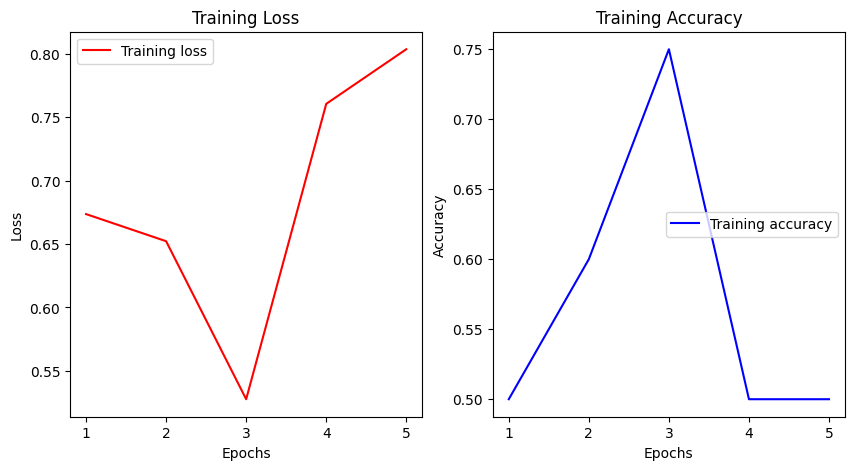

In [ ]:
import matplotlib.pyplot as plt

# Access training history from the 'history' variable
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(1, len(loss) + 1)

# Plot loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
pip install --upgrade gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 7.8 MB/s eta 0:

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Custom model class definition
class CustomLeafModel(tf.keras.Model):
    def __init__(self, num_classes):
        super(CustomLeafModel, self).__init__()

        # Load the pretrained MobileNetV2 model
        base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

        self.base_model = base_model
        self.global_avg_pooling = tf.keras.layers.GlobalAveragePooling2D()
        self.dense_1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense_2 = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.base_model(inputs)
        x = self.global_avg_pooling(x)
        x = self.dense_1(x)
        return self.dense_2(x)

# Create an instance of your custom model
num_classes = 2  # Healthy and Diseased
model = CustomLeafModel(num_classes)

# IMPORTANT: Call the model on some dummy data to create its variables
dummy_input_shape = (1, 224, 224, 3)
dummy_input = tf.ones(dummy_input_shape)
_ = model(dummy_input)

# Save model weights
model.save_weights('crop_disease_model.h5')

# Load model weights
model.load_weights('crop_disease_model.h5')

# Load and preprocess the test image
img_path = '/content/drive/MyDrive/test/healthy/shape 1009 .jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Decode predictions (assuming classes 0: Healthy, 1: Diseased)
class_labels = ['diseased', 'healthy']
predicted_class = np.argmax(predictions)
predicted_label = class_labels[predicted_class]

print(f"The leaf is predicted as: {predicted_label}")


1/1 [==============================] - 1s 984ms/step
The leaf is predicted as: diseased


In [ ]:
import os

class PlantDataset:
    def __init__(self):
        self.train_data_dir = '/content/drive/MyDrive/train1'
        self.test_data_dir = '/content/drive/MyDrive/test 1'

    def get_image_paths(self, subset='train', class_name=None):
        if subset == 'train':
            data_dir = self.train_data_dir
        elif subset == 'test':
            data_dir = self.test_data_dir
        else:
            raise ValueError("Subset must be 'train' or 'test'")

        if class_name:
            class_dir = os.path.join(data_dir, class_name)
            if not os.path.exists(class_dir):
                raise ValueError(f"Class directory '{class_dir}' does not exist.")
            image_paths = [os.path.join(class_dir, filename) for filename in os.listdir(class_dir)]
        else:
            image_paths = []
            for class_name in os.listdir(data_dir):
                class_dir = os.path.join(data_dir, class_name)
                if os.path.isdir(class_dir):
                    class_image_paths = [os.path.join(class_dir, filename) for filename in os.listdir(class_dir)]
                    image_paths.extend(class_image_paths)

        return image_paths

# Usage
plant_dataset = PlantDataset()

# Get image paths for training data (all classes)
train_image_paths = plant_dataset.get_image_paths(subset='train')

# Get image paths for testing data (specific class)
test_image_paths_flowers = plant_dataset.get_image_paths(subset='test', class_name='healthy')
test_image_paths_fruits = plant_dataset.get_image_paths(subset='test', class_name='diseased')


In [ ]:
import os

# Define your custom data directory paths
custom_train_data_dir = '/content/drive/MyDrive/train1'
custom_test_data_dir = '/content/drive/MyDrive/test 1'

# Define the PlantDataset class
class PlantDataset:
    def __init__(self, train_data_dir, test_data_dir):
        self.train_data_dir = train_data_dir
        self.test_data_dir = test_data_dir

    def get_image_paths(self, subset='train', class_name=None):
        # Rest of your code remains the same...

# Instantiate the PlantDataset class with your custom paths
      plant_dataset = PlantDataset(custom_train_data_dir, custom_test_data_dir)

# Get image paths for training data (all classes)
train_image_paths = plant_dataset.get_image_paths(subset='train')

# Get image paths for testing data (specific classes)
test_image_paths_healthy = plant_dataset.get_image_paths(subset='test', class_name='healthy')
test_image_paths_diseased = plant_dataset.get_image_paths(subset='test', class_name='diseased')
